<a href="https://colab.research.google.com/github/Minhaz63/Machine_learning_projects/blob/main/Dimond_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

Loading the data

In [ ]:
df1 = pd.read_csv(r'/content/Task_1_7.csv')
print(df1)

       carat        cut color clarity  depth  table     x     y     z   price
0       0.42      Ideal     E     VS2   62.1   56.0  4.80  4.77  2.97  1024.0
1       0.42      Ideal     D    VVS1   62.8   56.0  4.80  4.76  3.00  1621.0
2       1.51    Premium     J     VS2   62.3   59.0  7.31  7.35  4.57  7418.0
3       0.59  Very Good     F     VS2   62.0   58.0  5.35  5.42  3.34  1764.0
4       1.73      Ideal     J     SI1   62.6   57.0  7.69  7.65  4.80  6927.0
...      ...        ...   ...     ...    ...    ...   ...   ...   ...     ...
11413   1.19  Very Good     H     VS1   62.4   59.0  6.73  6.79  4.22  7147.0
11414   0.94       Good     I     SI2   63.8   60.0  6.14  6.21  3.94  3134.0
11415   1.01    Premium     G     SI2    NaN   60.0  6.48  6.44  3.88  4270.0
11416   0.72       Good     H     SI2   65.8   59.0  5.51  5.58  3.65  1945.0
11417   0.55       Good     I    VVS2   61.0   61.0  5.32  5.36  3.26  1384.0

[11418 rows x 10 columns]


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11418 entries, 0 to 11417
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    11404 non-null  float64
 1   cut      11411 non-null  object 
 2   color    11406 non-null  object 
 3   clarity  11408 non-null  object 
 4   depth    11096 non-null  float64
 5   table    11409 non-null  float64
 6   x        11409 non-null  float64
 7   y        11401 non-null  float64
 8   z        11406 non-null  float64
 9   price    11405 non-null  float64
dtypes: float64(7), object(3)
memory usage: 892.2+ KB


Trying to visualize the null value


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

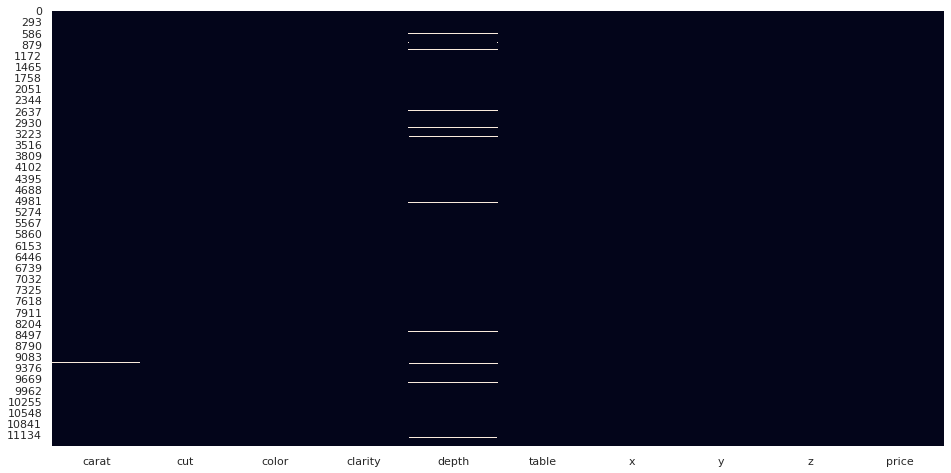

In [ ]:
sns.heatmap(df1.isnull(), cbar=False)

Here we *can* see that, there are some missing values in darity depth and table

removing the rows where clarity is missing
and for depth and table replace with missing value

In [ ]:
df1.isnull().sum()

carat       14
cut          7
color       12
clarity     10
depth      322
table        9
x            9
y           17
z           12
price       13
dtype: int64

In [ ]:
df1 = df1.dropna(subset=['clarity'])
df1 = df1.dropna(subset=['cut'])
df1 = df1.dropna(subset=['color'])


In [ ]:
df1.isnull().sum()

carat       14
cut          0
color        0
clarity      0
depth      321
table        9
x            9
y           17
z           12
price       13
dtype: int64

In [ ]:
df1['depth'].fillna(value=df1['depth'].mean(), inplace=True)
df1['carat'].fillna(value=df1['carat'].mean(), inplace=True)
df1['table'].fillna(value=df1['table'].mean(), inplace=True)
df1['x'].fillna(value=df1['x'].mean(), inplace=True)
df1['y'].fillna(value=df1['y'].mean(), inplace=True)
df1['z'].fillna(value=df1['z'].mean(), inplace=True)
df1['price'].fillna(value=df1['price'].mean(), inplace=True)

In [ ]:
df1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

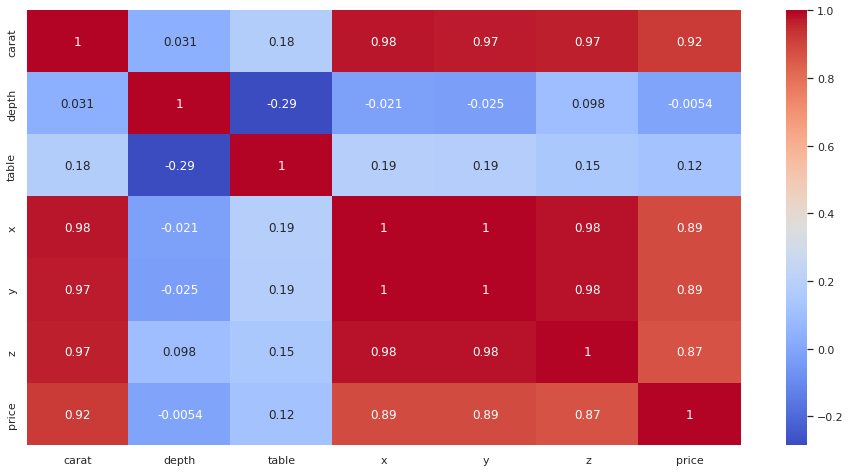

In [ ]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df1.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')


In [ ]:
df1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [ ]:
df1.describe()


,carat,depth,table,x,y,z,price
count,11389.000000,11389.000000,11389.000000,11389.000000,11389.000000,11389.000000,11389.000000
mean,0.805858,61.740757,57.460782,5.748409,5.750855,3.547212,3975.278833
std,0.478654,1.392060,2.243166,1.130517,1.121904,0.701142,4018.729847
min,0.200000,52.200000,49.000000,0.000000,0.000000,0.000000,335.000000
25%,0.400000,61.100000,56.000000,4.710000,4.720000,2.910000,955.000000
50%,0.710000,61.800000,57.000000,5.710000,5.730000,3.530000,2423.000000
75%,1.060000,62.500000,59.000000,6.570000,6.570000,4.050000,5437.000000
max,4.010000,72.200000,79.000000,10.140000,10.100000,6.170000,18804.000000


Here we can see the x y and z min value is 0, but it is not possible, so i have to removes those rows which contains those value.

In [ ]:
df1=df1.drop(df1[df1['x']==0].index)
df1=df1.drop(df1[df1['y']==0].index)
df1=df1.drop(df1[df1['z']==0].index)

now see the current position

In [ ]:
df1.describe()


,carat,depth,table,x,y,z,price
count,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000
mean,0.805499,61.741039,57.460370,5.748158,5.750625,3.548770,3972.334032
std,0.478267,1.391560,2.242805,1.128677,1.120083,0.697343,4014.601761
min,0.200000,52.200000,49.000000,3.730000,3.710000,1.070000,335.000000
25%,0.400000,61.100000,56.000000,4.710000,4.720000,2.910000,954.000000
50%,0.710000,61.800000,57.000000,5.710000,5.730000,3.530000,2423.000000
75%,1.060000,62.500000,59.000000,6.570000,6.570000,4.050000,5436.000000
max,4.010000,72.200000,79.000000,10.140000,10.100000,6.170000,18804.000000


In [ ]:
dum=pd.get_dummies(df1)

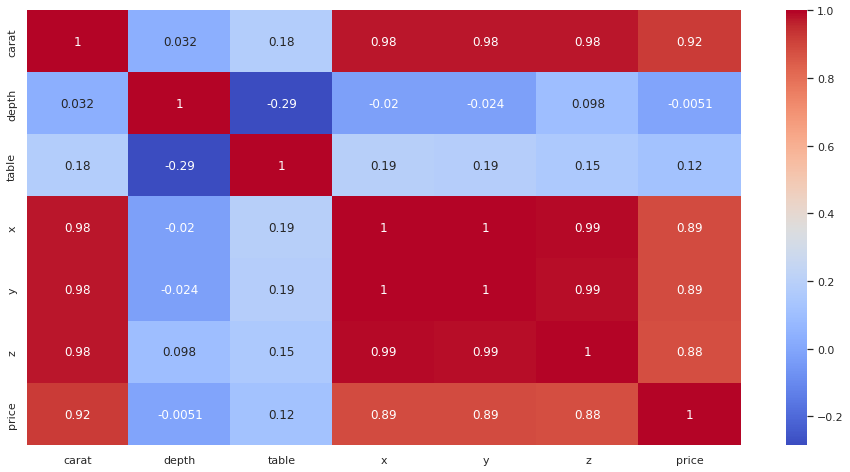

In [ ]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df1.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')


In [ ]:
dum.shape

(11384, 27)

In [ ]:
df1=dum

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
X=df1.drop(["price"],axis=1)
y= df1["price"]

We want to make train, test and validation dataset by 70,15,15 persent of the whole data


In [ ]:
train_size=0.7
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7,random_state=7)

# Now since we want the valid and test size to be equal (15% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=7)



In [ ]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),("lr_classifier",LinearRegression())])
pipeline_rf=Pipeline([("scalar3",StandardScaler()),("rf_classifier",RandomForestRegressor())])
pipelines = [pipeline_lr,pipeline_rf]



In [ ]:
pipe_dict = {0: "LinearRegression", 1: "RandomForest"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [ ]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1152.032177 
RandomForest: -688.247981 


Here we can see that random forrest give the best result

**For random forrest lets see the result**

In [ ]:
# Model prediction on test data
pred = pipeline_rf.predict(X_test)

In [ ]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9726271505318388
Adjusted R^2: 0.9722037751087739
MAE: 334.51833926389264
MSE: 457461.1682450434
RMSE: 676.3587570550435


In [ ]:
pred1 = pipeline_lr.predict(X_test)

For Linear **Regression** 

In [ ]:
print("R^2:",metrics.r2_score(y_test, pred1))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred1))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred1))
print("MSE:",metrics.mean_squared_error(y_test, pred1))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred1)))

R^2: 0.9205108363490239
Adjusted R^2: 0.9192813787315787
MAE: 758.8551257378926
MSE: 1328440.6400178724
RMSE: 1152.5799928932795
